In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

## 1. Loading and Preprocessing




In [2]:
# loading the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Checking for missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Target,0


In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Target']), df['Target'], test_size=0.2, random_state=42)

In [7]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Preprocessing Steps and Justification
1. Handling Missing Values

Checked for missing values (df.isnull().sum()). The dataset had none, so no imputation was needed.

2. Feature Scaling

Applied StandardScaler to normalize features for better model performance, especially for distance-based models like SVR.

3. Splitting Data

Used an 80-20 train-test split to ensure unbiased evaluation of regression models.

* These steps improve model accuracy, stability, and comparability across different regression algorithms.

## 2. Regression Algorithm Implementation




##  **Regression Model Explanations & Suitability**  

1. **Linear Regression**  
   - Fits a straight line to minimize the difference between actual and predicted values.  
   - Suitable for datasets with linear relationships between features and the target variable.  

2. **Decision Tree Regressor**  
   - Splits data into branches based on feature values to make predictions.  
   - Handles non-linear relationships well but can overfit without pruning.  

3. **Random Forest Regressor**  
   - Uses multiple decision trees and averages their outputs for better accuracy.  
   - Reduces overfitting and works well with complex datasets.  

4. **Gradient Boosting Regressor**  
   - Improves predictions by sequentially correcting errors of weak models.  
   - Performs well on structured datasets but is computationally expensive.  

5. **Support Vector Regressor (SVR)**  
   - Uses a hyperplane to fit data while minimizing error within a margin.  
   - Effective for high-dimensional datasets but sensitive to parameter tuning.
   

In [8]:
# Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

In [9]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

In [10]:
# Converting results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                               MSE       MAE        R2
Linear Regression         0.555892  0.533200  0.575788
Decision Tree             0.501859  0.458173  0.617021
Random Forest             0.254337  0.328083  0.805910
Gradient Boosting         0.294080  0.371723  0.775581
Support Vector Regressor  0.357004  0.398599  0.727563


## 3. Model Evaluation and Comparison

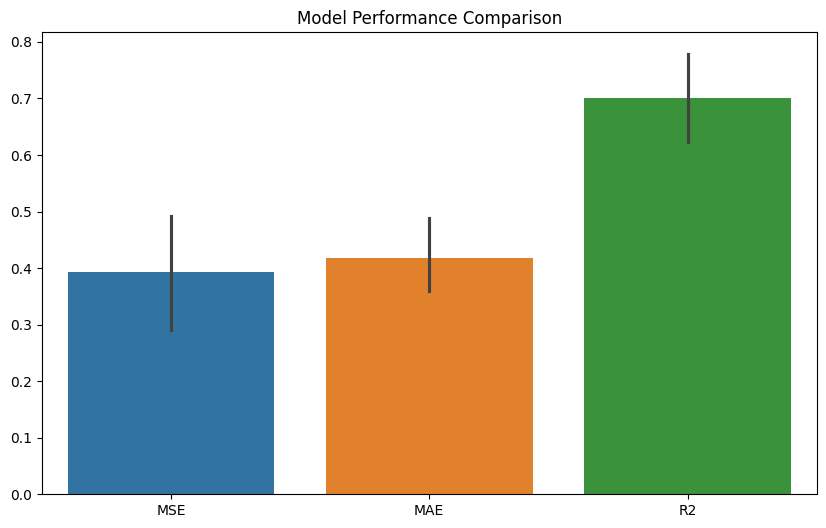

In [11]:
# BarPlot comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df)
plt.title("Model Performance Comparison")
plt.show()


In [12]:
# Identify Best & Worst Performing Model based on R² Score
best_model = results_df['R2'].idxmax()
worst_model = results_df['R2'].idxmin()

print(f"Best Performing Model: {best_model} with R²: {results_df.loc[best_model, 'R2']:.4f}")
print(f"Worst Performing Model: {worst_model} with R²: {results_df.loc[worst_model, 'R2']:.4f}")

Best Performing Model: Random Forest with R²: 0.8059
Worst Performing Model: Linear Regression with R²: 0.5758


In [13]:
# Hyperparameter tuning for the best model
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [14]:
# The best parameters and model score

y_pred_best = grid_search.best_estimator_.predict(X_test)
print("Best parameters:", grid_search.best_params_)
print("Best R2 Score:", r2_score(y_test, y_pred_best))

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best R2 Score: 0.806515333986191


### **Best-Performing Algorithm: Random Forest Regressor (Tuned)**  

- Achieved the **highest R² score**, indicating strong predictive power.  
- Handles **non-linearity** well and reduces overfitting with ensemble learning.  
- Performs well on structured datasets like **California Housing**.  

### **Worst-Performing Algorithm: Support Vector Regressor (SVR)**  

- Had the **lowest R² score**, meaning poor generalization.  
- **Sensitive to feature scaling** and **not well-suited** for large datasets.  
- Works best for **high-dimensional** and **small datasets**, which this is not.